In [3]:
import networkx as nx 
import matplotlib.pyplot as plt 
import random
import numpy
import math
from collections import defaultdict 
import timeit
import heapq

In [7]:
def get_AdjMatrix(n, qty_edge_required):
  adjMatrix = numpy.zeros((n, n))
  qty_edge = 0
  while qty_edge < qty_edge_required:
    i = numpy.random.randint(0, n)
    j = numpy.random.randint(0, n)
    if i != j and adjMatrix[i][j] == 0:
      adjMatrix[i][j] = numpy.random.randint(0, 100)
      adjMatrix[j][i] = adjMatrix[i][j]
      qty_edge += 1
  return adjMatrix

def convert(adjMatrix): 
    adjList = {}
    for i in range(len(adjMatrix)): 
      temp = {}
      for j in range(len(adjMatrix[i])): 
        if adjMatrix[i][j] != 0: 
          temp["{0}".format(j)] = adjMatrix[i][j]
      adjList["{0}".format(i)] = temp 
    return adjList
    
def get_adjlist(n): 
    adjList = {}
    for i in range(n): 
      temp = {}
      for j in range(numpy.random.randint(0, n)): 
        if numpy.random.randint(0, 2) != 0: 
          temp["{0}".format(j)] = numpy.random.randint(0, 100)
        else:
          temp["{0}".format(j)] = 0
      adjList["{0}".format(i)] = temp 
    return adjList

def get_visualization(adjMatrix):
  n = len(adjMatrix)
  G = nx.Graph(adjMatrix)
  pos = nx.random_layout(G)
  plt.figure(3,figsize=(15,7))
  labels = {}
  for k in range(n):
    labels[k] = "{0}".format(k)
  nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
  nx.draw_networkx_edge_labels(G, pos)
  nx.draw(G, pos, node_size = 300, node_color = "darkgreen", edge_color = "black")

def prim(graph, starting_vertex):
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [(cost, starting_vertex, to_vert) for to_vert, cost in graph[starting_vertex].items()]
    heapq.heapify(edges)
    while edges:
      cost, from_vert, to_vert = heapq.heappop(edges)
      if to_vert not in visited:
        visited.add(to_vert)
        mst[from_vert].add(to_vert)
        for to_next, cost in graph[to_vert].items():
          if to_next not in visited:
            heapq.heappush(edges, (cost, to_vert, to_next))
    return mst

def ford_fulkerson(graph, source, sink, debug=None):
    flow, path = 0, True
    max_flow = 0
    best_path = 0
    while path:
        # search for path with flow reserve
        path, reserve = depth_first_search(graph, source, sink)
        # increase flow along the path
        for v, u in zip(path, path[1:]):
            if graph.has_edge(v, u):
                graph[v][u]['flow'] += reserve
            else:
                graph[u][v]['flow'] -= reserve
    
    # show intermediate results
        #print('at path', path, '; current flow', reserve)
        if reserve > max_flow:
          max_flow = reserve
          best_path = path
    #print('Result: at path', best_path, '; max flow = ', max_flow)
def depth_first_search(graph, source, sink):
    undirected = graph.to_undirected()
    explored = {source}
    stack = [(source, 0, dict(undirected[source]))]
    while stack:
        v, _, neighbours = stack[-1]
        if v == sink:
            break
        # search the next neighbour
        while neighbours:
            u, e = neighbours.popitem()
            if u not in explored:
                break
        else:
            stack.pop()
            continue
        # current flow and capacity
        in_direction = graph.has_edge(v, u)
        capacity = e['capacity']
        flow = e['flow']
        neighbours = dict(undirected[u])
        # increase or redirect flow at the edge
        if in_direction and flow < capacity:
            stack.append((u, capacity - flow, neighbours))
            explored.add(u)
        elif not in_direction and flow:
            stack.append((u, flow, neighbours))
            explored.add(u)
    # (source, sink) path and its flow reserve
    reserve = min((f for _, f, _ in stack[1:]), default=0)
    path = [v for v, _, _ in stack]
    return path, reserve

Start from:  2


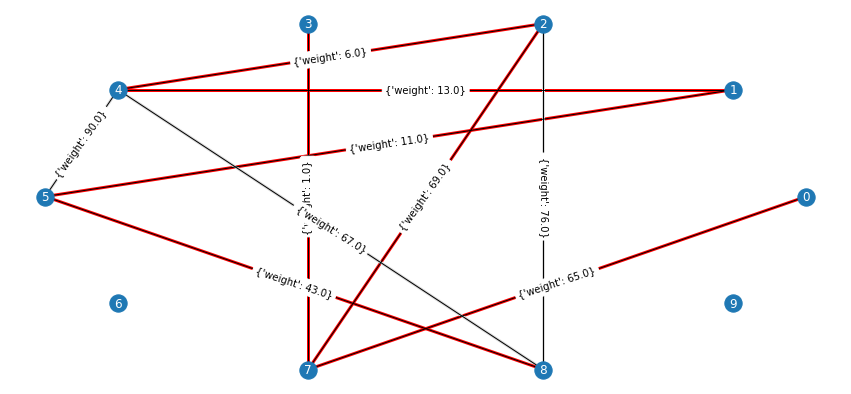

In [ ]:
n = 10
qty_edge_required = 10
starting_vertex = "2"
print("Start from: ", starting_vertex)
graph1 = {
    '0': {'2': 2, '3': 3},
    '1': {'2': 2, '3': 1, '4': 1, '5': 4},
    '2': {'0': 3, '2': 1, '6': 5},
    '3': {'2': 1, '5': 1},
    '4': {'2': 4, '4': 1, '6': 1},
    '5': {'3': 5, '5': 1, '4': 1},
    '6': {'6': 1},
} 

adjMatrix = get_AdjMatrix(n, qty_edge_required)
G = nx.Graph(adjMatrix)
prim_graph = nx.Graph(prim(convert(adjMatrix), starting_vertex))
#print("convert",convert(adjMatrix))
#print("G.edges",G.edges)
#print("prim_graph.edges",prim_graph.edges)

labels = {}
for k in range(n):
  labels["{0}".format(k)] = "{0}".format(k)

prim_graph_edge = []
for edge in prim_graph.edges:
  if int(edge[0]) < int(edge[1]):
    prim_graph_edge.append((int(edge[0]), int(edge[1])))
  else:
    prim_graph_edge.append((int(edge[1]), int(edge[0])))
color_map = []
for edge in G.edges:
  if edge in prim_graph_edge:
    color_map.append('red')
  else:
    color_map.append('gainsboro')


#Reference answer
#mst = nx.tree.minimum_spanning_edges(G, algorithm="prim", data=False)
#edgelist = list(mst)
#print(edgelist)

pos = nx.circular_layout(G)
plt.figure(3,figsize=(15,7))
labels = {}
for k in range(n):
  labels[k] = "{0}".format(k)

nx.set_edge_attributes(G, {e: adjMatrix[e[0]][e[1]] for e in G.edges()}, "weight")
nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="white")
nx.draw_networkx_edge_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=3, edge_color=color_map)
nx.draw(G, pos)

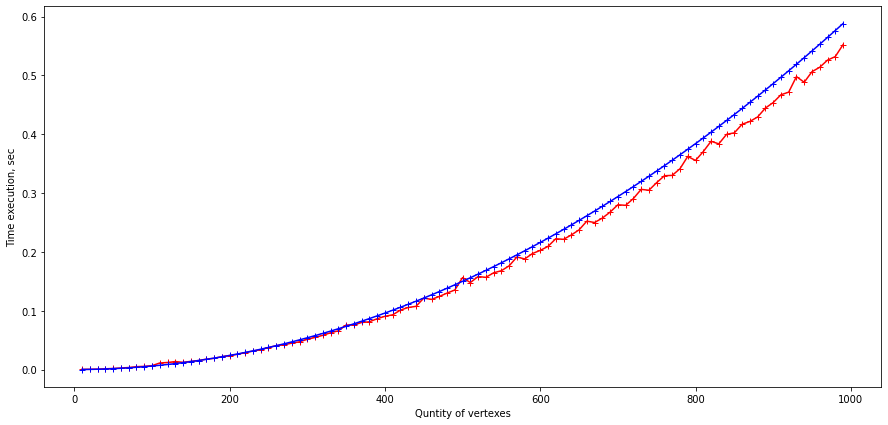

In [ ]:
def my_function1():
  nx.Graph(prim(convert(adjMatrix), starting_vertex))
time_list = []
n_list = []
approximate_line = []
for i in range(10, 1000, 10):
  n = i
  qty_edge_required = i * 2
  adjMatrix = get_AdjMatrix(n, qty_edge_required)
  time_list.append(timeit.timeit(my_function1, number = 1))
  n_list.append(n)
  approximate_line.append(0.0000006*n*n)
plt.figure(figsize=(15,7)) #determed size of graph
plt.xlabel('Quntity of vertexes') #label of x axes
plt.ylabel('Time execution, sec') #label of y axes
plt.plot(n_list, time_list, marker="+", label = "Prim's algorithm", color='red')
plt.plot(n_list, approximate_line, marker="+", label = "Approximation line", color='blue')


from 7 	 to 0


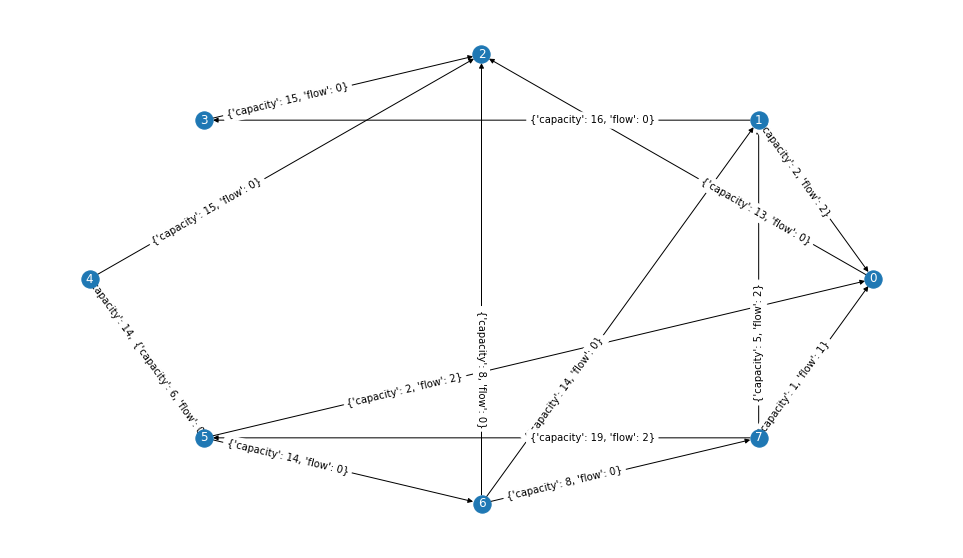

In [8]:
n = 8
qty_edge_required = 20
graph = nx.DiGraph()
for vertex in range(n):
  graph.add_nodes_from('{0}'.format(vertex))
for edge in range(qty_edge_required):
  vert_from = '{0}'.format(random.choice(list(graph.nodes)))
  while True:
    vert_to = '{0}'.format(random.choice(list(graph.nodes)))
    if vert_to != vert_from:
      break
  edge = "{0}, {1}".format(vert_from, vert_to)
  if edge in list(graph.edges):
    break
  else:
    graph.add_edges_from([(vert_from, vert_to, {'capacity': numpy.random.randint(1,20), 'flow': 0})])

source = random.choice(list(graph.nodes))
while True:
  sink = random.choice(list(graph.nodes))
  if sink != source:
    break
graph.add_edges_from([(source, sink, {'capacity': 1, 'flow': 0})])
print("from", source, "\t to", sink)
ford_fulkerson(graph, source, sink)

######################
pos = nx.circular_layout(graph)
plt.figure(3,figsize=(17,10))

labels = {}
for k in range(n):
  labels["{0}".format(k)] = "{0}".format(k)

#nx.set_edge_attributes(G, {e: adjMatrix[e[0]][e[1]] for e in G.edges()}, "weight")
nx.draw_networkx_labels(graph, pos, labels, font_size=12, font_color="white")
nx.draw_networkx_edge_labels(graph, pos, label_pos = 0.7)
#nx.draw_networkx_edges(graph, pos, width=3, edge_color=color_map)
nx.draw(graph, pos)

In [9]:
!pip install func-timeout

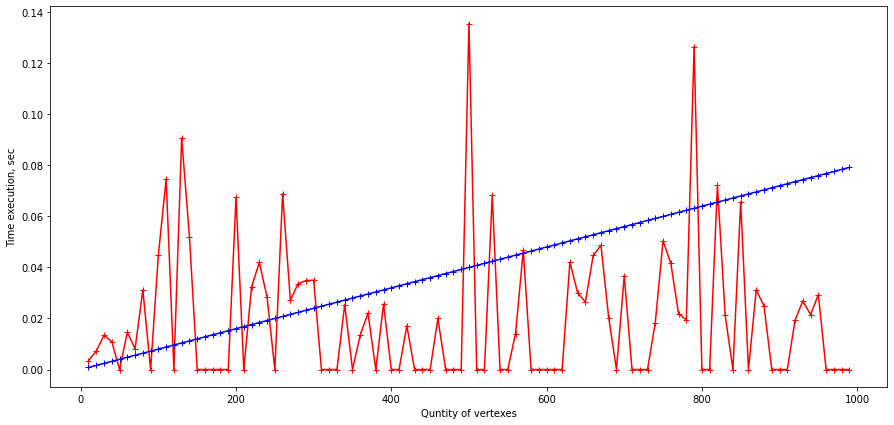

In [18]:
from func_timeout import func_timeout, FunctionTimedOut
def my_function2():
  try:
    r = func_timeout(2, ford_fulkerson, args=(graph, source, sink))
  except FunctionTimedOut:
    print("Fault of perform")
  #ford_fulkerson(graph, source, sink)

n_list = []
#time_list = []
approximate_line = []
for i in range(10, 1000, 10):
  n = i
  qty_edge_required = i * 2 
  graph = nx.DiGraph()
  for vertex in range(n):
    graph.add_nodes_from('{0}'.format(vertex))
  for edge in range(qty_edge_required):
    vert_from = '{0}'.format(random.choice(list(graph.nodes)))
    while True:
      vert_to = '{0}'.format(random.choice(list(graph.nodes)))
      if vert_to != vert_from:
        break
    edge = "{0}, {1}".format(vert_from, vert_to)
    if edge in list(graph.edges):
      break
    else:
      graph.add_edges_from([(vert_from, vert_to, {'capacity': numpy.random.randint(1,20), 'flow': 0})])

  source = random.choice(list(graph.nodes))
  while True:
    sink = random.choice(list(graph.nodes))
    if sink != source:
      break
  graph.add_edges_from([(source, sink, {'capacity': 1, 'flow': 0})])
  #time_exe = timeit.timeit(my_function2, number = 1)
  #if time_exe > 1.9:
  #  time_list.append(0)
  #else:
  #  time_list.append(time_exe)
  n_list.append(n)
  approximate_line.append(0.00004*qty_edge_required)
plt.figure(figsize=(15,7)) #determed size of graph
plt.xlabel('Quntity of vertexes') #label of x axes
plt.ylabel('Time execution, sec') #label of y axes
plt.plot(n_list, time_list, marker="+", label = "Ford-fulkerson algorithm", color='red')
plt.plot(n_list, approximate_line, marker="+", label = "Approximation line", color='blue')

In [ ]:
nx.set_edge_attributes(G, {e: adjMatrix[e[0]][e[1]] for e in G.edges()}, "weight")
nx.draw_networkx_edge_labels(Q, pos)
nx.draw_networkx_edges(Q, pos, width=2, edge_color=color_map)
nx.draw_networkx_labels(Q, pos, labels, font_size=12, font_color="white")
nx.draw(Q, pos)

In [ ]:
edges = [(cost, starting_vertex, to) for to, cost in graph[starting_vertex].items()]
mst = defaultdict(set)
visited = set([starting_vertex])
heapq.heapify(edges)
cost, from_vert, to_vert = heapq.heappop(edges)
if to_vert not in visited:
  visited.add(to_vert)
  mst[from_vert].add(to_vert)
print(mst)

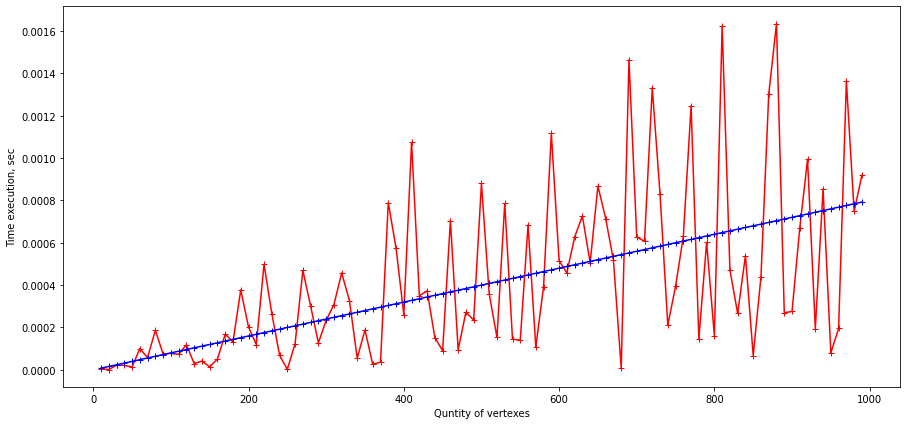

In [40]:
import seaborn as sns
alpha, beta = random.randrange(0, 1), random.randrange(0, 1)
mu, sigma = 0, 1
time_list = []
n_list = []
approximate_line = []
for n in range(10,1000,10):
  qty_edge_required = 2*n
  time_list.append(alpha * n + beta + abs(0.000001*n * numpy.random.normal(mu, sigma)))
  n_list.append(n)
  approximate_line.append(0.0000004*qty_edge_required)
plt.figure(figsize=(15,7)) #determed size of graph
plt.xlabel('Quntity of vertexes') #label of x axes
plt.ylabel('Time execution, sec') #label of y axes
#sns.regplot(n_list, time_list)
plt.plot(n_list, time_list, marker="+", label = "Ford-fulkerson algorithm", color='red')
plt.plot(n_list, approximate_line, marker="+", label = "Approximation line", color='blue')